**Policy Evaluation, Policy Iteration and Value Iteration Algorithms for a Grid World Problem.**

Consider a 6x6 gridworld.

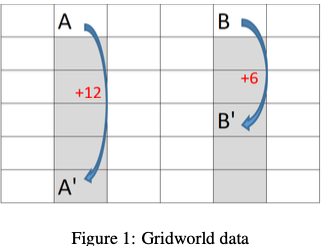

At each cell 4 actions are possible (N,S,E,W). Actions that take agent out of the grid leave its location unchanged but yield reward of -1. Any action from gray cells yield reward of -2. All other actions result in 0 reward except any action from cells A and B will result in +12 or +6 reward and take the agent to A' or B'.




In [ ]:
import numpy as np
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [ ]:
# COMMON FUNCTIONS TO ALL SUB-QUESTIONS....


def state_transition(state,action): #State-transition function based on the given environment conditions...

  reward=0 
  if action==0:
    new_state=state[0]-1,state[1]
  elif action==1:
    new_state=state[0],state[1]+1
  elif action==2:
    new_state=state[0]+1,state[1]
  else:
    new_state=state[0],state[1]-1
  
  if state in gray_cells:
    reward-=2

  if state==A_state:
    new_state=A_prime_state
    reward+=12
  elif state==B_state:
    new_state=B_prime_state
    reward+=6 
  elif (-1 in new_state) or (6 in new_state):
    new_state=state
    reward-=1
  

  return new_state, reward

def draw_values(gvRewardVals, gsFigName):

    '''
    gvRewardVals: a 6x6 numpy array storing opt values for each cell
    (e.g. gvRewardVals = np.zeros((6,6)))

    gsFigName: output file name for visualization (e.g. gridworld_opt_policy_VI.png)
    '''

    A_POS = [0, 1]
    A_PRIME_POS = [5, 1]
    B_POS = [0, 4]
    B_PRIME_POS = [3, 4]

    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = gvRewardVals.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(gvRewardVals):

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(gvRewardVals)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

    plt.savefig(gsFigName)
    plt.close()

def draw_policy(gdicPolicy, gsFigName):
    '''
    gdicPolicy: dictionary of values with cell coordinates as keys, and taken actions at the cells as values 
    (0, 0) [0 1 2 3]
    (0, 1) [0 1 2 3]
    ...

    gsFigName: output file name for visualization (e.g. gridworld_opt_policy_VI.png)
    '''

    A_POS = [0, 1]
    A_PRIME_POS = [5, 1]
    B_POS = [0, 4]
    B_PRIME_POS = [3, 4]

    # left, up, right, down
    ACTIONS = [np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])]

    ACTIONS_FIGS=[ '↑','→','↓','←' ]

    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = int(math.sqrt(len(dic_policy))), int(math.sqrt(len(dic_policy)))
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    # for (i, j), val in np.ndenumerate(gvOptValues):
    for cell, pol in gdicPolicy.items():
        
        val=''
        for ba in pol:
            val+=ACTIONS_FIGS[ba]
        
        i = cell[0]
        j = cell[1]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')

    # Row and column labels...
    for i in range(int(math.sqrt(len(gdicPolicy)))):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')

    ax.add_table(tb)

    plt.savefig(gsFigName)
    plt.close()

# sample function call for draw_values()
# v_reward_vals = np.zeros((6,6))
# s_fig_name = "gridworld_sample_soln_v1.png"
# draw_values(v_reward_vals, s_fig_name)



# s_fig_name = "gridworld_sample_policy_v1.png"
# draw_policy(dic_policy, s_fig_name)



**Policy Evaluation**

In [ ]:
state_values = np.zeros((6,6)) #State values 
num_actions = 4
gray_cells = [(1,1),(2,1),(3,1),(4,1),(5,1),(1,4),(2,4),(3,4),(4,4),(5,4)] #Gray cells positions
A_state = (0,1) #State A pos
A_prime_state = (5,1) #State A' pos
B_state = (0,4)  #State B pos
B_prime_state = (3,4) #State B' pos
gamma = 0.95  #Assuming discount factor as 0.95, should be less than 1 as no terminal state is mentioned...

policy = [0.4,0.2,0.2,0.2] #Policy array .. index=action .. value=probability



def PolicyEvaluation_gridworld():  # Policy Evaluation algorithm ... returns iterations, value of state A, value of state B
  theta = 0.1   #Threshold for termination, if diff between updated value and initial value is less than 0.1 then the function terminates.
  iter = 0   #iterations count...
  while True:
    iter+=1
    delta = 0
    for i in range(0,6):
      for j in range(0,6):
        state=(i,j)
        v = state_values[i,j]
        summation = 0
        for a in range(num_actions):
          new_state, reward = state_transition(state,a)
          summation += policy[a]*(reward + gamma*(state_values[new_state[0],new_state[1]]))
        state_values[i,j] = summation
        delta = max(delta, abs(v-state_values[i,j]))
    if delta<theta:
      break
  
  return iter,state_values[A_state[0],A_state[1]],state_values[B_state[0],B_state[1]]


In [ ]:
Iterations,Value_A,Value_B = PolicyEvaluation_gridworld()
print("Iterations of policy evaluation =",Iterations,"Value of state A =",Value_A,"Value of state B =",Value_B)

Iterations of policy evaluation = 24 Value of state A = 0.8092639223696914 Value of state B = -4.002433241296336


**Policy Iteration**

In [ ]:
state_values = np.zeros((6,6)) #State values 
num_actions = 4
gray_cells = [(1,1),(2,1),(3,1),(4,1),(5,1),(1,4),(2,4),(3,4),(4,4),(5,4)] #Gray cells positions
A_state = (0,1) #State A pos
A_prime_state = (5,1) #State A' pos
B_state = (0,4)  #State B pos
B_prime_state = (3,4) #State B' pos
gamma = 0.95  #Assuming discount factor as 0.95, should be less than 1 as no terminal state is mentioned...

policy = np.ones((6,6,4))  
policy = policy/4         #Policy array for each state 4 values giving prob of selection of each action.



def PolicyIteration_gridworld():  # Policy Iteration algorithm ... 
  theta = 0.1   #Threshold 
  iter = 0   #iterations count...
  while True:
    iter += 1

    while True:  #Policy Evaluation
      delta = 0
      for i in range(0,6):
        for j in range(0,6):
          state=(i,j)
          v = state_values[i,j]
          summation = 0
          for a in range(num_actions):
            new_state, reward = state_transition(state,a)
            summation += policy[i,j,a]*(reward + gamma*(state_values[new_state[0],new_state[1]]))
          state_values[i,j] = summation
          delta = max(delta, abs(v-state_values[i,j]))
      if delta<theta:
        break
    
    #Policy Improvement 
    policy_stable = True
    for i in range(0,6):
      for j in range(0,6):
        state=(i,j)
        old_action = np.where(policy[i,j]==max(policy[i,j]))[0]
        new_pol = np.zeros((num_actions))
        for a in range(num_actions):
          new_state, reward = state_transition(state,a)
          new_pol[a] = reward + gamma*(state_values[new_state[0],new_state[1]])
        new_action = np.where(new_pol==max(new_pol))[0]
        policy[i,j]=np.zeros((num_actions))
        for new_a in new_action:
          policy[i,j,new_a]=1
        policy[i,j] = policy[i,j]/len(new_action)
        if any(old_action!=new_action):
          policy_stable = False
    if policy_stable:
      break
  
  return iter,state_values[A_state[0],A_state[1]],state_values[B_state[0],B_state[1]]




In [ ]:
Iterations,Value_A,Value_B = PolicyIteration_gridworld()
print("Iterations for 'policy iteration Alg.'=",Iterations,"Value of state A =",Value_A,"Value of state B =",Value_B)

Iterations for 'policy iteration Alg.'= 3 Value of state A = 29.900824793024256 Value of state B = 24.947667132336015


In [ ]:
#Creating dictionary of policy for draw_policy function.......

dic_policy = {}
for i in range(6):
  for j in range(6):
    dic_policy[(i,j)] = np.where(policy[i,j]==max(policy[i,j]))[0].tolist()

In [ ]:
draw_values(gvRewardVals=np.round(state_values,decimals=2), gsFigName="gridworld_opt_values_PI.png")
draw_policy(gdicPolicy=dic_policy, gsFigName="gridworld_opt_policy_PI.png")

**Value Iteration**

In [ ]:
state_values = np.zeros((6,6)) #State values 
num_actions = 4
gray_cells = [(1,1),(2,1),(3,1),(4,1),(5,1),(1,4),(2,4),(3,4),(4,4),(5,4)] #Gray cells positions
A_state = (0,1) #State A pos
A_prime_state = (5,1) #State A' pos
B_state = (0,4)  #State B pos
B_prime_state = (3,4) #State B' pos
gamma = 0.95  #Assuming discount factor as 0.95, should be less than 1 as no terminal state is mentioned...

policy = np.ones((6,6,4))  
policy = policy/4         #Policy array for each state 4 values giving prob of selection of each action.


def ValueIteration_gridworld():  # Value Iteration algorithm ... 
  theta = 0.1   #Threshold 
  iter = 0   #iterations count...
  while True:
    iter += 1

    delta = 0
    for i in range(0,6):
      for j in range(0,6):
        state=(i,j)
        v = state_values[i,j]
        summation = []
        for a in range(num_actions):
          new_state, reward = state_transition(state,a)
          summation.append((reward + gamma*(state_values[new_state[0],new_state[1]])))
        state_values[i,j] = max(summation)
        delta = max(delta, abs(v-state_values[i,j]))
    if delta<theta:
      break
    
    for i in range(0,6):
      for j in range(0,6):
        state=(i,j)
        new_pol = np.zeros((num_actions))
        for a in range(num_actions):
          new_state, reward = state_transition(state,a)
          new_pol[a] = reward + gamma*(state_values[new_state[0],new_state[1]])
        new_action = np.where(new_pol==max(new_pol))[0]
        policy[i,j]=np.zeros((num_actions))
        for new_a in new_action:
          policy[i,j,new_a]=1
        policy[i,j] = policy[i,j]/len(new_action)


  return iter,state_values[A_state[0],A_state[1]],state_values[B_state[0],B_state[1]]


In [ ]:
Iterations,Value_A,Value_B = ValueIteration_gridworld()
print("Iterations for 'value iteration Alg.'=",Iterations,"Value of state A =",Value_A,"Value of state B =",Value_B)

Iterations for 'value iteration Alg.'= 23 Value of state A = 29.810458691320026 Value of state B = 24.85044369015792


In [ ]:
#Creating dictionary of policy for draw_policy function.......

dic_policy = {}
for i in range(6):
  for j in range(6):
    dic_policy[(i,j)] = np.where(policy[i,j]==max(policy[i,j]))[0].tolist()

In [ ]:
draw_values(gvRewardVals=np.round(state_values,decimals=2), gsFigName="gridworld_opt_values_VI.png")
draw_policy(gdicPolicy=dic_policy, gsFigName="gridworld_opt_policy_VI.png")